<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/proyecto_2/blob/main/Proyecto_2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Old car price Analysis.

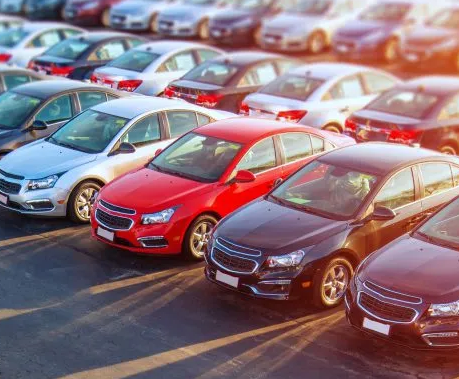

Se tiene  un conjunto de datos con informacion sobre automoviles y sus caracteristicas de uso como tambien su año de creacion, informacion con la que se busca predecir su precio.
 Se cuenta con multiples caracteristicas utiles, y algunas no tanto, las cuales seran analizadas y procesadas a detalle.

El objetivo principal es el entendimiento de la informacion que se tiene para lograr un correcto procesamiento y finalmente una buena prediccion del precio del vehiculo.

Finalmente, es preciso decir que se trata de un problema de **regresion** por ende los modelos a utilizar seran acordes para la obtencion de mejores resultados.


#Librerias a utilizar

In [304]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [401]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [306]:
filename = "/content/drive/MyDrive/Data CodingDojo/car_price.csv"
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


# **Inicio EDA**

**Descripcion de columnas**

- car_name: contiene el nombre del vehiculo.
- car_prices_in_rupee: contiene el valor del vehiculo.
- kms_driven: Indica los kilometros recorridos del vehiculo.
- fuel_type: Indica el tipo de combustible del vehiculo.
- transmission: Indica el tipo de transmision del vehiculo.
- ownership: Cantidad de dueños que ha tenido el vehiculo.
- manufacture: Año de manufactura del vehiculo. 
- engine: Contiene la cilindrada del vehiculo.
- seats: Indica la cantidad de asientos del vehiculo.

In [307]:
print(f"Registros nulos: {df.isna().sum().sum()} \nRegistros duplicados: {df.duplicated().sum()}\n")
df.info()

Registros nulos: 0 
Registros duplicados: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [308]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

**Se identifican problemas con columna "engine"  por lo cual se opta por eliminarla**
- Se identifican algunos modelos para su examinacion. En este caso usaremos el modelo "Maruti Alto 800 LXI" y el año "2017" para inspeccionar columnas.

In [309]:
df["car_name"].value_counts()

Maruti Alto 800 LXI          53
Maruti Swift VXI             46
Maruti Wagon R VXI BS IV     43
Maruti Swift Dzire VDI       42
Maruti Swift Dzire VXI       42
                             ..
Tata New Safari XT            1
Hyundai Creta 1.6 E Plus      1
Toyota Etios 2014-2016 GD     1
Mahindra Marazzo M8 8Str      1
BMW M Series M4 Coupe         1
Name: car_name, Length: 1896, dtype: int64

In [310]:
df[(df["car_name"]== "Maruti Alto 800 LXI")&(df["manufacture"]==2017)][["car_name","engine"]]

,car_name,engine
1094,Maruti Alto 800 LXI,1995 cc
1363,Maruti Alto 800 LXI,1598 cc
1684,Maruti Alto 800 LXI,2143 cc
2670,Maruti Alto 800 LXI,1493 cc
2738,Maruti Alto 800 LXI,1462 cc
2748,Maruti Alto 800 LXI,1197 cc
2926,Maruti Alto 800 LXI,1199 cc
3134,Maruti Alto 800 LXI,1198 cc
5022,Maruti Alto 800 LXI,1197 cc
5126,Maruti Alto 800 LXI,1199 cc


**Se puede apreciar que el modelo "Maruti Alto 800 LXI", hecho en 2017. tiene distintas cilindradas, por ende se opta por eliminar esta columnas.**

In [311]:
df.drop(["Seats"], axis=1, inplace=True)

In [312]:
df.drop(["engine"], axis=1, inplace=True)

**A continuacion se trabajara la columna "car_prices_in_rupee".**
- valores seran limpiados de cualquier caracter o letra.
- seran convertidos en dolares.

In [313]:
df["car_prices_in_rupee"] = df["car_prices_in_rupee"].str.replace("Crore","10000000")
df["car_prices_in_rupee"] = df["car_prices_in_rupee"].str.replace("Lakh","100000")
df["car_prices_in_rupee"] = df["car_prices_in_rupee"].str.replace(",",".")

Se crea lista dividida entre el precio en rupias y su unidad en miles (crore y lakh)

In [314]:
price_separador = df["car_prices_in_rupee"].str.split(" ")
price_separador

0       [10.03, 100000]
1       [12.83, 100000]
2       [16.40, 100000]
3        [7.77, 100000]
4        [5.15, 100000]
             ...       
5507    [28.90, 100000]
5508    [64.90, 100000]
5509    [13.75, 100000]
5510    [29.90, 100000]
5511    [31.90, 100000]
Name: car_prices_in_rupee, Length: 5512, dtype: object

**Ahora para tener el valor total en rupias, multiplicaremos cada elemento en:**
- Lakh: unidad de medida, equivale a 100000
- crore: unidad de medida, equivale a 10000000


In [315]:
df["car_prices_in_dollar"] = 0
for x in range(0, 5512):
    if price_separador[x][1] != "": 
        df["car_prices_in_dollar"][x] = float(price_separador[x][0]) * float(price_separador[x][1])
    else:
        df["car_prices_in_dollar"][x] = float(price_separador[x][0]) * 1000
df["car_prices_in_dollar"] = df["car_prices_in_dollar"] * 0.012

<ipython-input-315-8cf969a58ac4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["car_prices_in_dollar"][x] = float(price_separador[x][0]) * float(price_separador[x][1])
<ipython-input-315-8cf969a58ac4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["car_prices_in_dollar"][x] = float(price_separador[x][0]) * 1000


**A continuacion podemos apreciar con las 5 primeras y ultimas columnas que el resultado de la operacion fue exitoso**

In [316]:
df.sort_values("car_prices_in_dollar", ascending=False).head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,car_prices_in_dollar
5406,Land Rover Range Rover 3.0 Petrol LWB Vogue BSIV,1.92 10000000,"40,000 kms",Petrol,Automatic,1st Owner,2019,230400.0
4160,Land Rover Range Rover 3.0 Petrol LWB Vogue BSIV,1.92 10000000,"40,000 kms",Petrol,Automatic,1st Owner,2019,230400.0
3097,Land Rover Range Rover 3.0 Petrol LWB Vogue BSIV,1.92 10000000,"40,000 kms",Petrol,Automatic,1st Owner,2019,230400.0


In [317]:
df.sort_values("car_prices_in_dollar", ascending=True).head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,car_prices_in_dollar
3336,Maruti 800 Std,35.000,"80,000 kms",Petrol,Manual,2nd Owner,1999,420.0
4668,Tata Nano Lx,35.000,"50,000 kms",Petrol,Manual,2nd Owner,2011,420.0
4948,Tata Nano Lx BSIV,35.000,"1,00,000 kms",Petrol,Manual,1st Owner,2012,420.0


**Finalmente se elimina columna "car_prices_in_rupee"**

In [318]:
df.drop("car_prices_in_rupee", axis=1, inplace=True)

**Columna ["kms_drive"]**

In [319]:
df["kms_driven"] = df["kms_driven"].str.replace(" kms","")
df["kms_driven"] = df["kms_driven"].str.replace(",","")
df["kms_driven"] = df["kms_driven"].astype(int)

**Transformacion de columna "ownership" a numero**

In [320]:
df["ownership"].value_counts()

1st Owner    3736
2nd Owner    1314
3rd Owner     359
4th Owner      84
5th Owner      12
0th Owner       7
Name: ownership, dtype: int64

Tras inspeccion de columna "ownership", se decide excluir registros cuyos valores sean "0th Owner"

In [321]:
df = df[df["ownership"] != "0th Owner"]

In [322]:
df["ownership"].value_counts()

1st Owner    3736
2nd Owner    1314
3rd Owner     359
4th Owner      84
5th Owner      12
Name: ownership, dtype: int64

In [323]:
df["ownership"].replace({"1st Owner":0,"2nd Owner":1,"3rd Owner":2,"4th Owner":3,"5th Owner":4}, inplace=True)

**Para terminar con el preprocesamiento de datos, excluiremos los registros duplicados**

In [324]:
df = df[~df.duplicated()]

# Visualizaciones

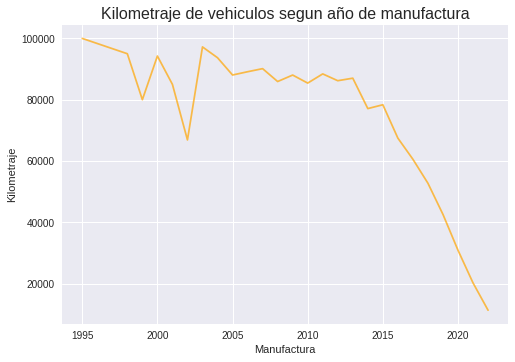

In [ ]:
plt.style.use("seaborn")
df.groupby("manufacture")["kms_driven"].mean().plot(c="orange", alpha=.7)
plt.ylabel("Kilometraje")
plt.xlabel("Manufactura")
plt.title('Kilometraje de vehiculos segun año de manufactura',fontsize = 16);

- Este grafico muestra una tendencia natural en cualquier vehiculo, la cual indica mientras mas antiguo sea, mayor kilometraje tendra.
- Tambien sugiere una buena salud de nuestro conjunto de datos.

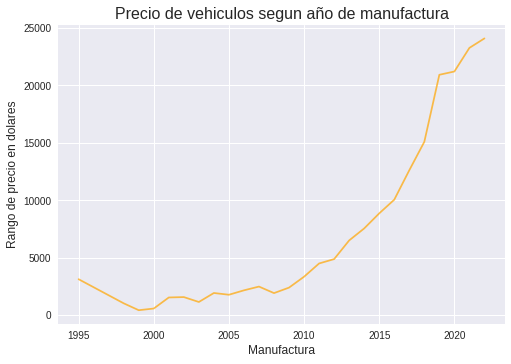

In [ ]:
plt.style.use("seaborn")
df.groupby("manufacture")["car_prices_in_dollar"].mean().plot(c="orange", alpha=.7)
plt.ylabel("Rango de precio en dolares", fontsize=12)
plt.xlabel("Manufactura",fontsize=12)
plt.title('Precio de vehiculos segun año de manufactura',fontsize = 16);

- Otra tendencia natural es decir que el precio de un vehiculo incrementa segun su año de manufactura. Tal cual se aprecia en el grafico mostrado.

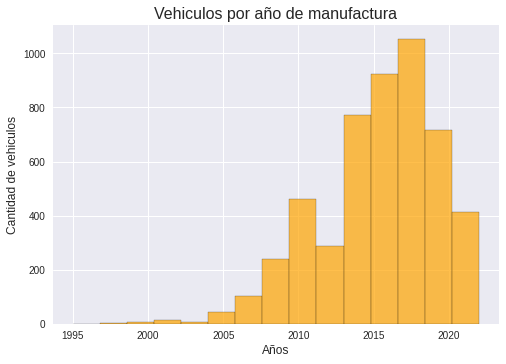

In [ ]:
df["manufacture"].plot(kind="hist",alpha=.7,color="orange",bins=15, edgecolor="black")
plt.ylabel("Cantidad de vehiculos",fontsize=12)
plt.xlabel("Años",fontsize=12)
plt.title('Vehiculos por año de manufactura',fontsize = 16);

- Del universo de autos en nuestro conjunto de datos es posible observar que la mayoria de estos fueron creados desde el año 2010, un año relativamente reciente en cuanto a vehiculos se trata.

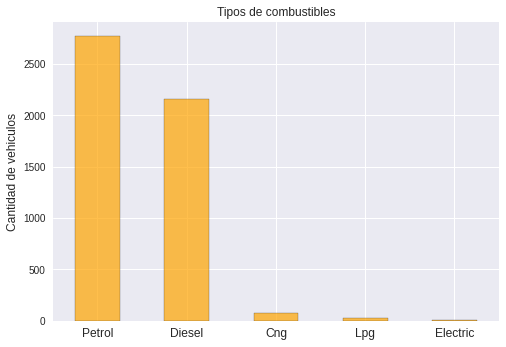

In [ ]:
df["fuel_type"].value_counts().plot(kind="bar",alpha=.7,color="orange", edgecolor="black")
plt.ylabel("Cantidad de vehiculos",fontsize=12)
plt.title("Tipos de combustibles", fontsize=12)
plt.xticks(rotation="horizontal",fontsize=12);

Text(0.5, 1.0, 'Tipos de transmisiones')

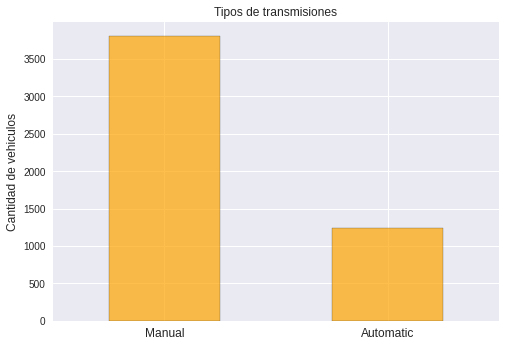

In [ ]:
df["transmission"].value_counts().plot(kind="bar",alpha=.7,color="orange", edgecolor="black")
plt.xticks(rotation="horizontal",fontsize=12);
plt.ylabel("Cantidad de vehiculos",fontsize=12)
plt.title("Tipos de transmisiones", fontsize=12)


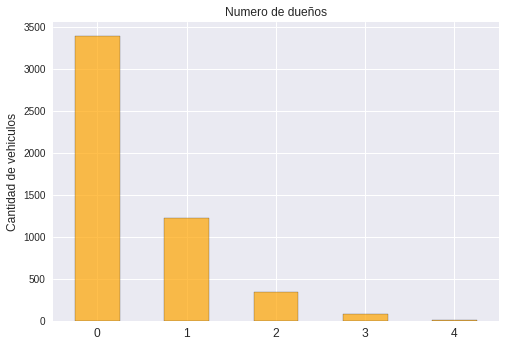

In [ ]:
df["ownership"].value_counts().plot(kind="bar",alpha=.7,color="orange", edgecolor="black")
plt.xticks(rotation="horizontal",fontsize=12)
plt.ylabel("Cantidad de vehiculos",fontsize=12)
plt.title("Numero de dueños", fontsize=12);

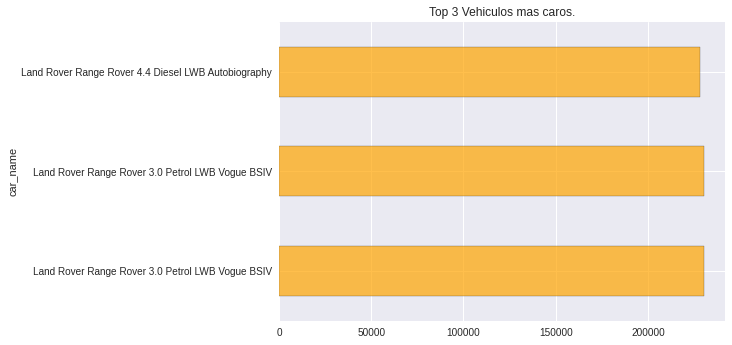

In [ ]:
df.nlargest(3,"car_prices_in_dollar").plot(x="car_name",y="car_prices_in_dollar",kind="barh", color="orange",edgecolor="black",alpha=.7)
plt.legend("", loc="lower right")
plt.title("Top 3 Vehiculos mas caros.")
plt.xticks(rotation=0,fontsize=10);


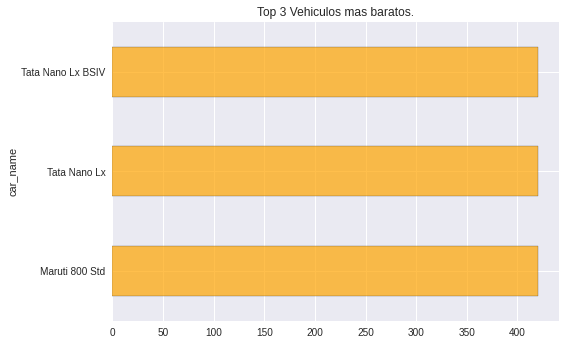

In [ ]:
df.nsmallest(3,"car_prices_in_dollar").plot(x="car_name",y="car_prices_in_dollar",kind="barh", color="orange",edgecolor="black",alpha=.7)
plt.legend("", loc="lower right")
plt.title("Top 3 Vehiculos mas baratos.")
plt.xticks(rotation=0,fontsize=10);

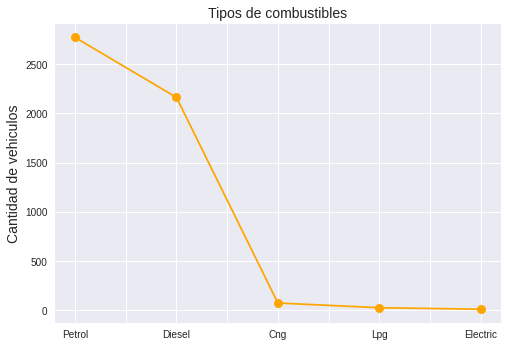

In [ ]:
plt.style.use("seaborn")
df["fuel_type"].value_counts().plot(kind="line", marker=".",markersize=18, color="orange")
plt.title("Tipos de combustibles",fontsize=14)
plt.ylabel("Cantidad de vehiculos", fontsize=14);

**A continuacion se muestra la correlacion de las caracteristicas del conjunto de dato**

In [ ]:
df = df[["car_name","kms_driven","ownership","transmission","manufacture","car_prices_in_dollar"]]

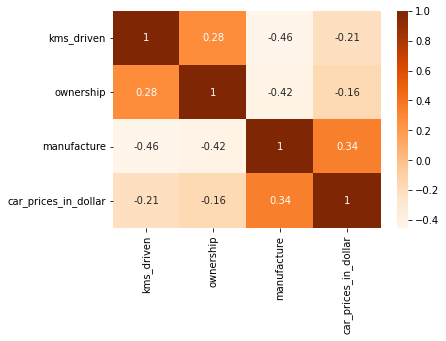

In [325]:
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Oranges")

**De este heatmap podemos sugerir que:**
- existe una correlacion indirecta entre kms_driven y precio. mientras mayor sea el kilometraje menor sera el precio.
- existe una correlacion indirecta entre ownership y precio. mientras mas dueños, menor es el precio.
- existe una correlacion directa entre el año del vehiculo y su precio.



# Preparacion para aplicacion de Machine Learning
- Ya teniendo todas nuestras columnas limpias, sin valores nulos ni duplicados. Podemos comenzar con el preprocesamiento para el ajusto de los modelos de machine learning.

**Train test split**

In [349]:
X = df.drop(columns=["car_prices_in_dollar"])
y = df["car_prices_in_dollar"]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

**Instanciar selectores de columnas**

In [350]:
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")

In [351]:
print(num_selector(X_train))
print(cat_selector(X_train))

['kms_driven', 'ownership', 'manufacture']
['car_name', 'fuel_type', 'transmission']


**Instanciar transformadores**

In [352]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)

**Instanciar Column Transformer**

In [353]:
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)
preprocessor = make_column_transformer(num_tuple, cat_tuple)

**Ajuste a datos de entrenamiento**

In [354]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe673301d60>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe673301130>)])

In [355]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**Debido a la alta cantidad de modelos de vehiculos en nuestro conjunto de datos, luego de realizar el preproceso la cantidad de columnas aumenta a 3703.**

In [333]:
X_train_processed.shape

(3703, 1622)

###**Aplicacion de PCA para reduccion de dimensionalidad**
- Al final, este procedimiento no se aplica  por la distribucion de los data points. El modelo de regresion lineal funciona mejor con una codificacion OHE con sparse=False. lo cual es incompatible con PCA.


In [358]:
#pca = PCA(n_components=.99)

#X_train = pca.fit_transform(X_train_processed)
#X_test = pca.transform(X_test_processed)

# Aplicacion de modelos de  Machine Learning

## Regresion Lineal con PCA.99

In [345]:
reg_PCA = LinearRegression()
reg_PCA.fit(X_train, y_train)
reg_PCA_train_score = reg_PCA.score(X_train, y_train)
reg_PCA_test_score = reg_PCA.score(X_test, y_test)
print(reg_PCA_train_score)
print(reg_PCA_test_score)

0.8236366515929152
0.6592326079390769


## Regresion Lineal sin PCA

In [357]:
reg = LinearRegression()
reg.fit(X_train_processed, y_train)
reg_train_score = reg.score(X_train_processed, y_train)
reg_test_score = reg.score(X_test_processed, y_test)
print(reg_train_score)
print(reg_test_score)

0.973842931683338
0.7187444380652444


## Random Forest Regressor

- En primera instancia aplicaremos este modelo de manera por defecto. visualizaremos los resultados para luego aplicar hyperparametros.

In [344]:
rf = RandomForestRegressor(random_state=10)
rf.fit(X_train_processed, y_train)
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

0.9210684315765891
0.6124082557829778


**Hyperparameter tunning!**

- a continuacion buscaremos un valor para iterar y ver los mejores resultados para el modelo de arbol aleatorio.

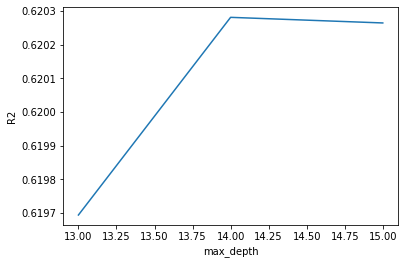

In [372]:
max_depth = list(range(13, 16))
r2_depth = []
for x in max_depth:
    rf_x = RandomForestRegressor(max_depth = x,
                             random_state = 10)
    rf_x.fit(X_train_processed, y_train)
    score = rf_x.score(X_test_processed, y_test)
    r2_depth.append(score)
plt.plot(max_depth, r2_depth)
plt.xlabel('max_depth')
plt.ylabel('R2');

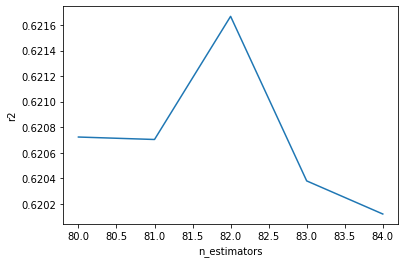

In [378]:
# Lista de valores a probar para n_estimators:
n_estimators = list(range(80, 85))
r2_estimators = []
for x in n_estimators:
    rf_x = RandomForestRegressor(n_estimators = x, max_depth=14,
                             random_state = 10)
    rf_x.fit(X_train_processed, y_train)
    score = rf_x.score(X_test_processed, y_test)
    r2_estimators.append(score)
plt.plot(n_estimators, r2_estimators)
plt.xlabel('n_estimators')
plt.ylabel('r2');

In [379]:
rf_tunned = RandomForestRegressor(random_state=10, max_depth=14, n_estimators=82)
rf_tunned.fit(X_train_processed, y_train)
rf_tunned_train_score = rf_tunned.score(X_train_processed, y_train)
rf_tunned_test_score = rf_tunned.score(X_test_processed, y_test)
print(f"Score conjunto de entrenamiento: {rf_tunned_train_score}")
print(f"Score conjunto de prueba         {rf_tunned_test_score}")

Score conjunto de entrenamiento: 0.8327159806924164
Score conjunto de prueba         0.6216679747981115


## KNN Regresor

In [368]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train_processed, y_train)
KNN_train_score = KNN.score(X_train_processed, y_train)
KNN_test_score = KNN.score(X_test_processed, y_test)
print(KNN_train_score)
print(KNN_test_score)

0.8239030183690446
0.47978995452622475


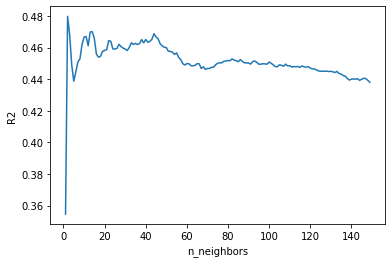

In [381]:
n_neighbors = list(range(1, 150))
r2_knn = []
for x in n_neighbors:
    KNN_x = KNeighborsRegressor(n_neighbors=x)
    KNN_x.fit(X_train_processed, y_train)
    score = KNN_x.score(X_test_processed, y_test)
    r2_knn.append(score)
plt.plot(n_neighbors, r2_knn)
plt.xlabel('n_neighbors')
plt.ylabel('R2');

In [383]:
KNN_tunned = KNeighborsRegressor(n_neighbors=2)
KNN_tunned.fit(X_train_processed, y_train)
KNN_tunned_train_score = KNN_tunned.score(X_train_processed, y_train)
KNN_tunned_test_score = KNN_tunned.score(X_test_processed, y_test)
print(KNN_tunned_train_score)
print(KNN_tunned_test_score)

0.8239030183690446
0.47978995452622475


##**Buscando el modelo apropiado**

- Despues de haber aplicado modelos de regresion lineal y arbol aleatorio. Se pudo observar que el mejor resultado lo dio el modelo de regresion lineal sin PCA. 
- En cuanto al modelo de arbol aleatorio, incluso despues de configurar hyperparametros logro un resultado poco satisfactorio.
- KNN arrojo los resultados mas bajos de los 3 modelos empleados. 


In [393]:
print("-"* 30)
print("Linear regression score")
print(reg_test_score)
print("-"* 30)
print("Random Forest regression score")
print(rf_tunned_test_score)
print("-"* 30)
print("KNN regression score")
print(KNN_tunned_test_score)
print("-"* 30)


------------------------------
Linear regression score
0.7187444380652444
------------------------------
Random Forest regression score
0.6216679747981115
------------------------------
KNN regression score
0.47978995452622475
------------------------------


**Con esto, y evaluando la metrica R2 de cada modelo implementado. es posible decir que no se recomienda el uso de machine learning en este conjunto de datos. pues las predicciones no son del todo certeras.**

## Posibles mejoras para una mejor prediccion.

- Robustecer el conjunto de datos con nuevas caracteristicas como: "horse_power" indicando la potencia del vehiculo.
- La columna eliminada "engine" con un dato fidedigno seria vital para este conjunto de datos puesto que esta directamente relacionada con el vector objetivo.
- Contando con las caracteristicas indicadas anteriormente se reforzarian los algoritmos dedicados a hayar correlaciones con el objetivo y por ende el coeficiente de determinacion R^2 seria mejor.
